In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Uppgift 1 - uppvärmning covid-19 data
a) Gör initial dataanalys för att snabbt få en överblick över datasetet. Använd metoder som ex. 

info(),
describe(), value_counts(), head(), columns, index för att snabbt få en överblick.


In [4]:
weekly_data_sweden = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

# first_sheet.info()
# first_sheet.head()
# first_sheet.describe()
# first_sheet.value_counts()
# first_sheet.columns

### b) Slå ihop kolumnerna "år" och "veckonummer" till en kolumn med namn "Vecka" med följande format:

In [5]:
# Concatenating "år" and "veckonummer" into the desired format
weekly_data_sweden["Datum"] = weekly_data_sweden['år'].astype(str) + "v" + weekly_data_sweden["veckonummer"].astype(str)

# Displaying the updated DataFrame to verify the changes
weekly_data_sweden[["Datum"]].head()

# Drop the "år" and "veckonummer" columns
weekly_data_sweden.drop(['år', 'veckonummer'], axis=1, inplace=True)

# Saving the modified DataFrame into a new Excel file
output_file_path = 'data/Modified_Folkhalsomyndigheten_Covid19.xlsx'
weekly_data_sweden.to_excel(output_file_path, sheet_name='datum', index=False)






### c) Rita en linjediagram som visar avlidna fall per vecka från 2020v6 till nu.


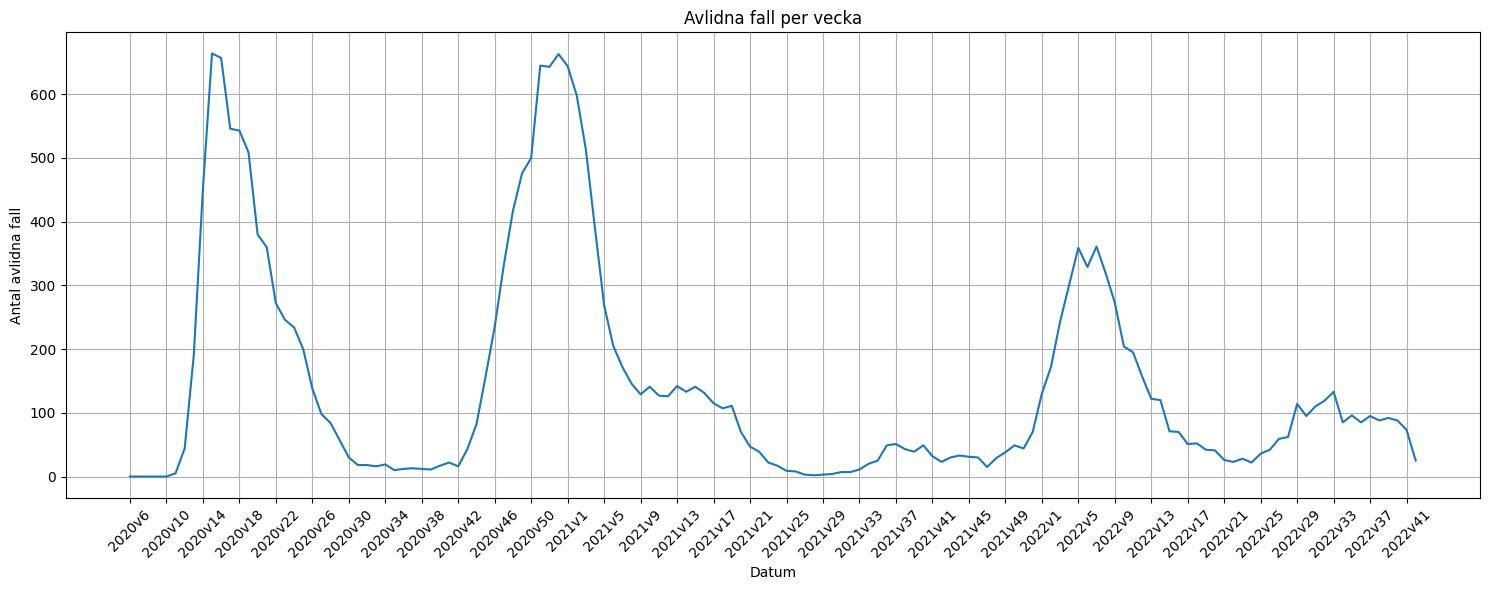

In [6]:
# Creating the line plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Datum', y='Antal_avlidna_vecka', data=weekly_data_sweden)
plt.title('Avlidna fall per vecka')
plt.xlabel('Datum')
plt.ylabel('Antal avlidna fall')

# Setting x-ticks to show every 4 weeks
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.savefig("Visualiseringar/avlidna_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
# Show the plot
plt.show()



### d) Rita en linjediagram som visar nya fall per vecka från 2020v6 till nu.

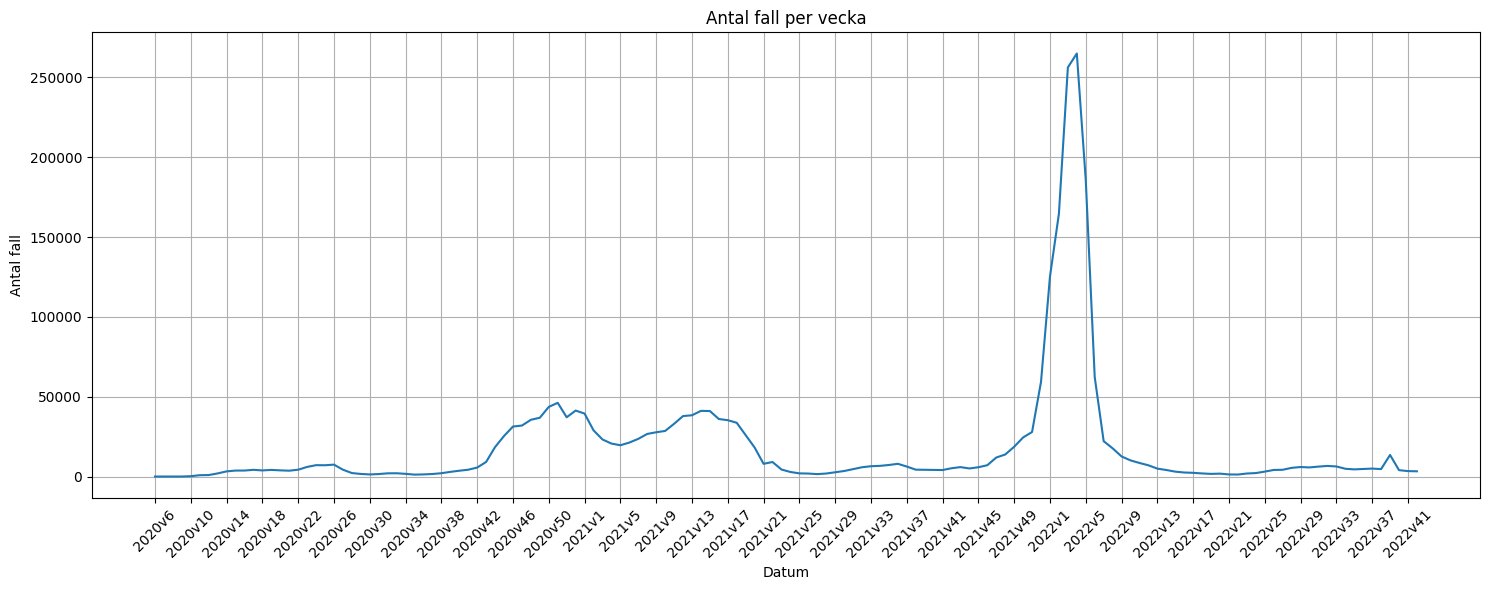

In [7]:
# Creating the line plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Datum', y='Antal_fall_vecka', data=weekly_data_sweden)
plt.title('Antal fall per vecka')
plt.xlabel('Datum')
plt.ylabel('Antal fall')

# Setting x-ticks to show every 4 weeks
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.savefig("Visualiseringar/antal_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
# Show the plot
plt.show()

### e) Rita linjediagram av både avlidna fall per vecka och nya fall per vecka i samma fönster från 2020v6 till nu.


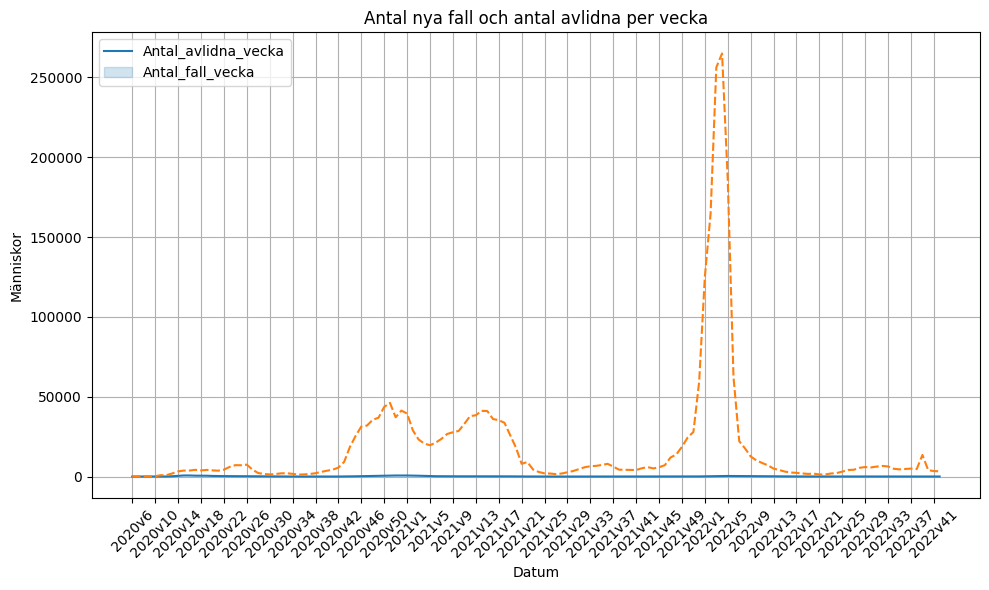

In [8]:
dataset1 = pd.DataFrame(weekly_data_sweden["Antal_avlidna_vecka"])
dataset2 = pd.DataFrame(weekly_data_sweden["Antal_fall_vecka"])

concatenated_dataset = pd.concat([dataset1, dataset2], axis=1)

concatenated_dataset

# Plotting with seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=concatenated_dataset)
plt.title("Antal nya fall och antal avlidna per vecka")
plt.xlabel('Datum')
plt.ylabel('Människor')
plt.legend(['Antal_avlidna_vecka', 'Antal_fall_vecka'], loc='upper left')
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()

plt.savefig("Visualiseringar/kombinerade_avlidna_och_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
plt.show()

### f) Rita linjediagram av kumulativt antal fall från 2020v6 till nu

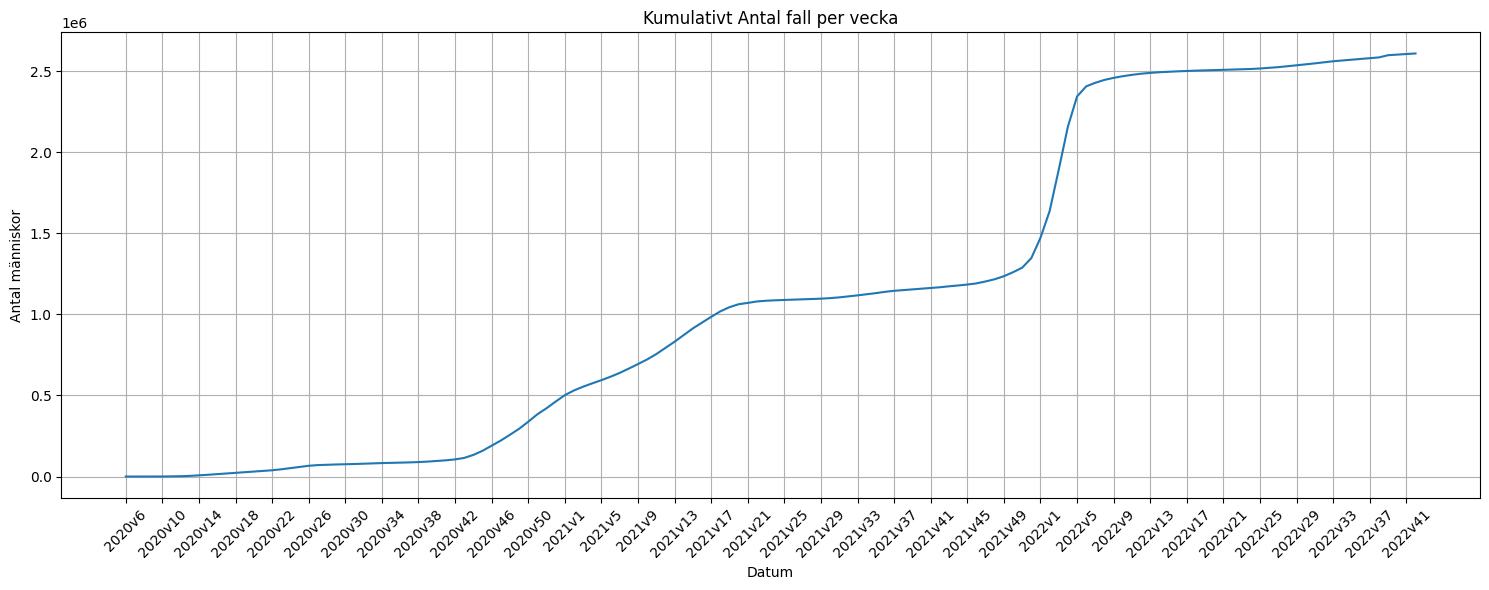

In [9]:
# Creating the line plot with Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(x='Datum', y='Kum_antal_fall', data=weekly_data_sweden)
plt.title('Kumulativt Antal fall per vecka')
plt.xlabel('Datum')
plt.ylabel('Antal människor')

# Setting x-ticks to show every 4 weeks
# Extract every 4th week from 'Datum' column
every_4th_week = weekly_data_sweden['Datum'].iloc[::4]

# Set these as x-ticks
plt.xticks(ticks=np.arange(len(weekly_data_sweden['Datum']))[::4], labels=every_4th_week, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.savefig("Visualiseringar/Kum_antal_fall_per_vecka_2020v6_till_nu") # Saves the figure to Visualiseringar
# Show the plot
plt.show()

### Uppgift 2 - uppvärmning vaccindata


In [17]:
vaccine_data = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx")
vaccine_kommun = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kommun")
vaccine_sex = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade kön")
vaccine_data_ages = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Dos 1 till 3 per åldersgrupp")
                            
vaccine_data.columns

vaccine_data_ages.columns


Index(['Region', 'Åldersgrupp', 'Antal vaccinerade', 'Andel vaccinerade',
       'Vaccinationsstatus'],
      dtype='object')

### a) Hur många län finns representerade i datasetet?


In [11]:
regions = len(vaccine_data["Region"].unique())

print(f"Amount of regions in dataset: {regions-1}") # -1 since the I Sverige I doesn't count as a region

vaccine_data["Region"].unique()



Amount of regions in dataset: 21


array(['| Sverige |', 'Stockholm', 'Uppsala', 'Södermanland',
       'Östergötland', 'Jönköping', 'Kronoberg', 'Kalmar', 'Gotland',
       'Blekinge', 'Skåne', 'Halland', 'Västra Götaland', 'Värmland',
       'Örebro', 'Västmanland', 'Dalarna', 'Gävleborg', 'Västernorrland',
       'Jämtland', 'Västerbotten', 'Norrbotten'], dtype=object)

### b) Hur många kommuner finns representerade i datasetet?

In [12]:
print(f"Antal kommuner i blad 'Vaccinerade kommun': {len(vaccine_kommun["KnNamn"].unique())}")

Antal kommuner i blad 'Vaccinerade kommun': 290


### c) Hur stor är befolkningen som är representerad i datasetet?

In [13]:
#Kollar på Vaccinerade kön och går till "Kön > Totalt > Vaccinationstatus minst 1 dos"

vaccine_sex.query("Vaccinationsstatus == 'Minst 1 dos'")

tot_vaccine = vaccine_sex["Antal vaccinerade"].head(1) 
print(f"Totalt är det {tot_vaccine[0]} människor i datasetet")

Totalt är det 7810380 människor i datasetet


### d) Beräkna hur många barn under 18 år det finns i Sverige baserat på det här datasetet. Du får leta upp statistik på hur stor totala befolkningen är i Sverige.


In [14]:
#Ifrån google 2022 var folkmängden i Sverige 10 521 556. Antalet kvinnor var 5 223 232 och män 5 298 324
population_2022 = 10521556
under_18 =  population_2022-tot_vaccine[0]
print(f"Det kanske är {under_18} personer")

#Kom precis på att datamägden bara representerade 85% av alla människor som vaccinerat sig vilket motsvarar 17/20 så vi får ta och räkna ut det

estimated_population = tot_vaccine[0] / 0.85
print(estimated_population)
under_18 = population_2022-estimated_population

print(f"Det kanske är {int(under_18.round())} personer")

#Kollade på hur många som föddes mellan 2003-2022 och det var runt 100-110 tusen per år och så då är befolkningsmängden under 18 2022 runt 1 460 000 miljoner

Det kanske är 2711176 personer
9188682.352941176
Det kanske är 1332874 personer


### e) Rita ett diagram som visar på åldersfördelningen av Sveriges befolkning.


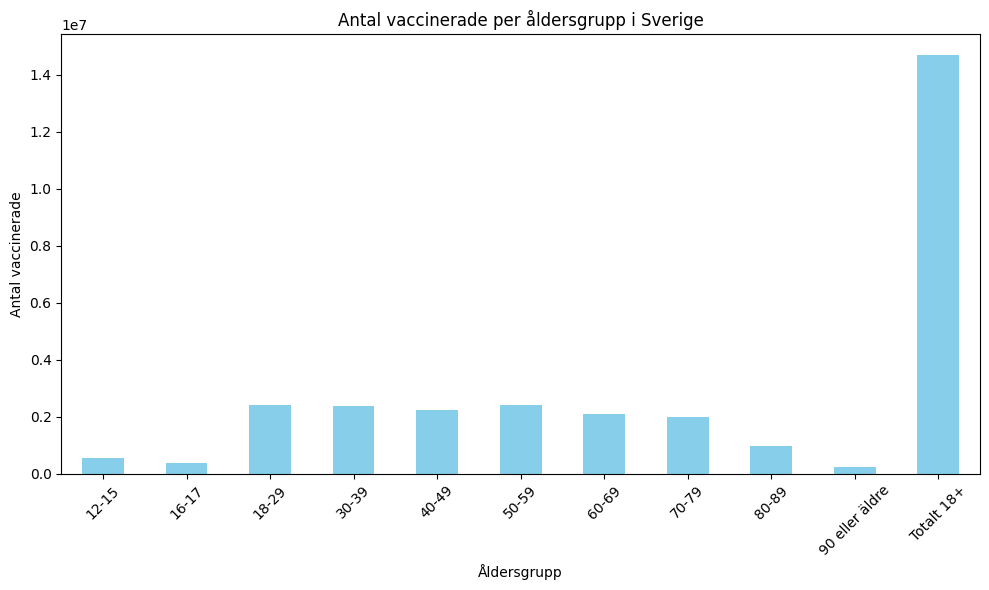

In [20]:
# Börja här imorgon (2023-11-14)
import matplotlib.pyplot as plt

# Preparing the data for the plot
# Grouping the data by age group and summing the number of vaccinated people
age_group_vaccination_totals = vaccine_data_ages.groupby('Åldersgrupp')['Antal vaccinerade'].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
age_group_vaccination_totals.plot(kind='bar', color='skyblue')
plt.title('Antal vaccinerade per åldersgrupp i Sverige')
plt.xlabel('Åldersgrupp')
plt.ylabel('Antal vaccinerade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Visualiseringar/Antal_vaccinerade_per_aldersgrupp_sverige") # Saves the figure to Visualiseringar
# Showing the plot
plt.show()

### f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per län


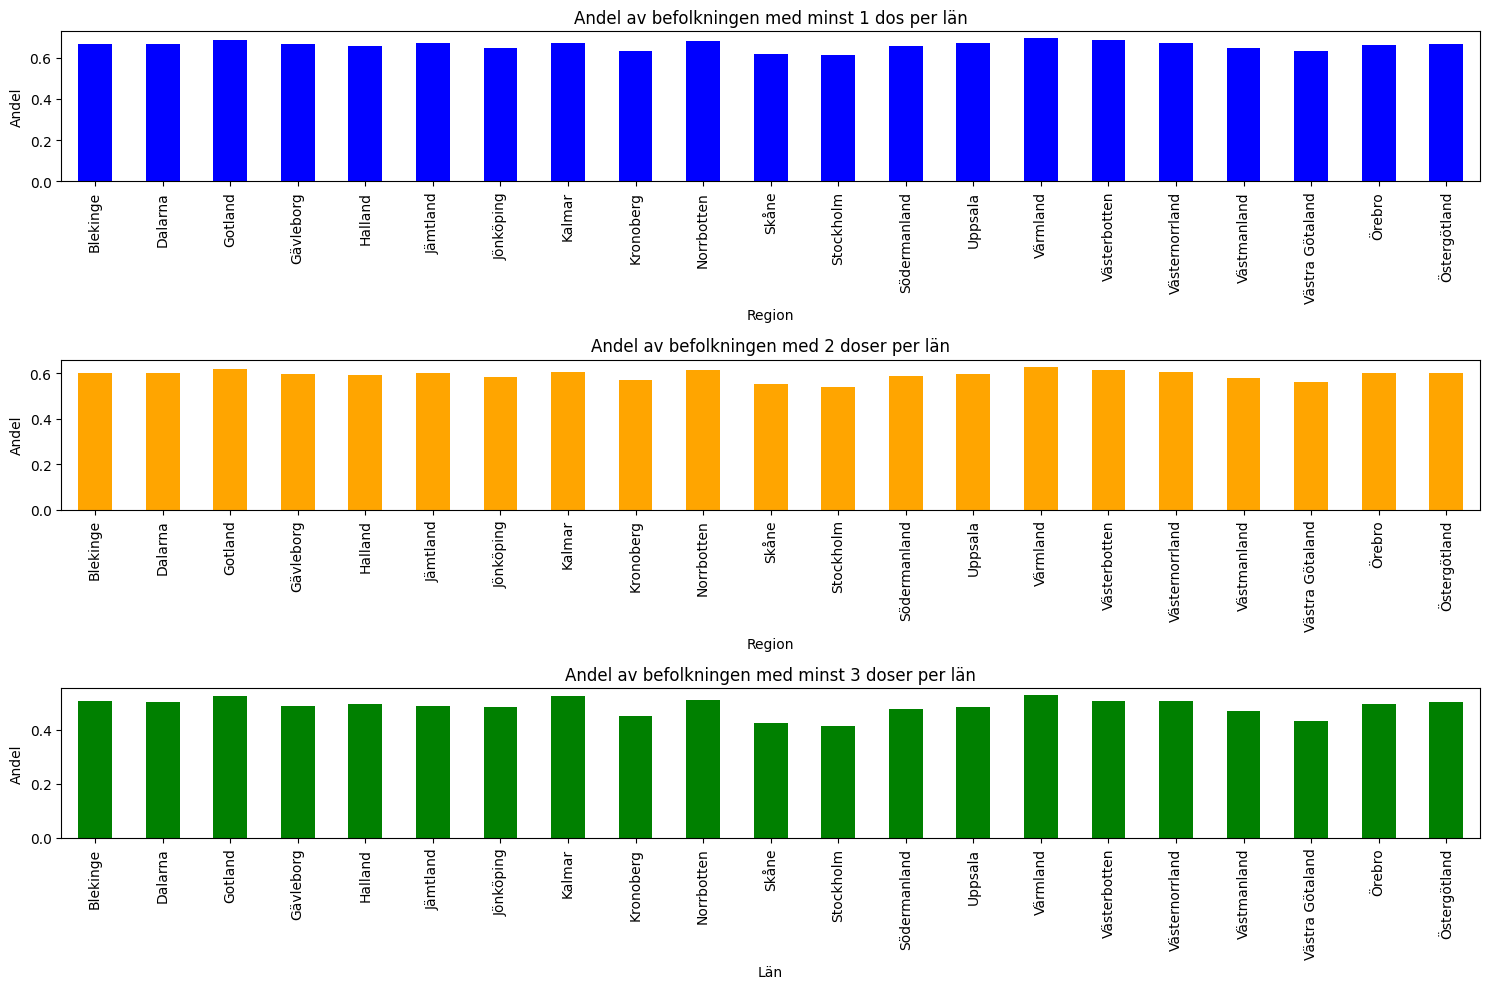

In [26]:
sheet_name_one_dose_two_doses = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name='Vaccinerade tidsserie')
sheet_name_three_doses = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name='Vaccinerade tidsserie dos 3')

# Preparing the data for each vaccination status again: at least 1 dose, 2 doses, and 3 doses
data_one_dose = sheet_name_one_dose_two_doses[sheet_name_one_dose_two_doses['Vaccinationsstatus'] == 'Minst 1 dos']
data_two_doses = sheet_name_one_dose_two_doses[sheet_name_one_dose_two_doses['Vaccinationsstatus'] == 'Minst 2 doser']
data_three_doses = sheet_name_three_doses[sheet_name_three_doses['Vaccinationsstatus'] == '3 doser']

# Removing the "Sverige" entry and grouping the data by region again
one_dose_percentage = data_one_dose.groupby('Region')['Andel vaccinerade'].mean().drop('| Sverige |')
two_doses_percentage = data_two_doses.groupby('Region')['Andel vaccinerade'].mean().drop('| Sverige |')
three_doses_percentage = data_three_doses.groupby('Region')['Andel vaccinerade'].mean().drop('| Sverige |')

# Re-plotting the data without the "Sverige" entry
plt.figure(figsize=(15, 10))

# Plot for at least one dose
plt.subplot(3, 1, 1)
one_dose_percentage.plot(kind='bar', color='blue')
plt.title('Andel av befolkningen med minst 1 dos per län')
plt.ylabel('Andel')

# Plot for two doses
plt.subplot(3, 1, 2)
two_doses_percentage.plot(kind='bar', color='orange')
plt.title('Andel av befolkningen med 2 doser per län')
plt.ylabel('Andel')

# Plot for three doses
plt.subplot(3, 1, 3)
three_doses_percentage.plot(kind='bar', color='green')
plt.title('Andel av befolkningen med minst 3 doser per län')
plt.ylabel('Andel')

plt.xlabel('Län')
plt.tight_layout()

plt.savefig("Visualiseringar/Andel_Befolkning_Doser") # Saves the figure to Visualiseringar

plt.show()



### g) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos, två doser, tre doser och fyra doser

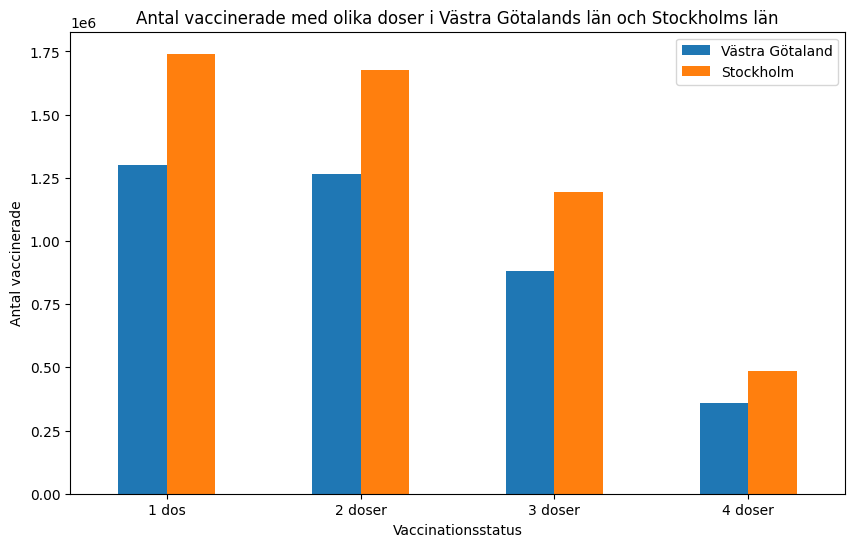

In [45]:
#Använt chatgpt för att skapa alla diagram ovanför. Men insåg att jag var lat och tappat meningen med uppgiften.
#Så för att visa att jag faktiskt kan behandla data har jag valt att skriva denna för hand med hjälp av de resuser som finns i code_alongs

#Uppgiften är att filtrera ut Västra Götalands Län och Stockholms Län och spara datan i en lämplig struktur.

#För att hitta all data jag som behövs för att klara uppgiften måste jag läsa in blad "Vaccinerade tidsserie", "Vaccinerade tidsseroe dos 3" och "Vaccinerade tidsseroe dos 4"

#Läser in datan
first_data_sheet_vaccine = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie")
second_data_sheet_vaccine = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie dos 3")
third_data_sheet_vaccine = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie dos 4")

#Nu är frågan om jag ska göra en tidsserie för dos1,dos2,dos3,dos4 för varje län eller om jag ska ta senaste värdet som är inläst.
#Bestämde mig för att filtrera ut stockholm och västra götaland för varje sheet
vg_data = first_data_sheet_vaccine[first_data_sheet_vaccine["Region"] == "Västra Götaland"]
stockholm_data = first_data_sheet_vaccine[first_data_sheet_vaccine["Region"] == "Stockholm"]
#Nu har jag dos1 och dos2 i vg_data och stockholm_data respektivt, nu behöver jag skapa 4 fler sorteringar som tar ut dos1 och dos2 för varje län
vg_one_dose = vg_data[vg_data["Vaccinationsstatus"] == "Minst 1 dos"]["Antal vaccinerade"].max()
vg_two_doses = vg_data[vg_data["Vaccinationsstatus"] == "Minst 2 doser"]["Antal vaccinerade"].max()
stockholm_one_dose = stockholm_data[stockholm_data["Vaccinationsstatus"] == "Minst 1 dos"]["Antal vaccinerade"].max()
stockholm_two_doses = stockholm_data[stockholm_data["Vaccinationsstatus"] == "Minst 2 doser"]["Antal vaccinerade"].max()
# Nu har jag sparat antalet för varje dos i första bladet. Dags för samma sak fast för blad 2 och 3
vg_three_doses = second_data_sheet_vaccine[second_data_sheet_vaccine["Region"] == "Västra Götaland"]["Antal vaccinerade"].max()
vg_four_doses = third_data_sheet_vaccine[third_data_sheet_vaccine["Region"] == "Västra Götaland"]["Antal vaccinerade"].max()
stockholm_three_doses = second_data_sheet_vaccine[second_data_sheet_vaccine["Region"] == "Stockholm"]["Antal vaccinerade"].max()
stockholm_four_doses = third_data_sheet_vaccine[third_data_sheet_vaccine["Region"] == "Stockholm"]["Antal vaccinerade"].max()

#Nu har jag 8 data punkter som jag kan sätta in i ett fint stapeldiagram för att jämföra antalet doser emellan de olika regionerna
#Men först så måste jag slänga in värderna i en DataFrame
vaccination_data = pd.DataFrame({
    "Vaccination Status": ["1 dos", "2 doser", "3 doser", "4 doser"],
    "Västra Götaland": [vg_one_dose, vg_two_doses, vg_three_doses, vg_four_doses],
    "Stockholm": [stockholm_one_dose, stockholm_two_doses, stockholm_three_doses, stockholm_four_doses]
})

vaccination_data

#Plotten
vaccination_data.plot(x="Vaccination Status", kind="bar", figsize=(10, 6))
plt.title("Antal vaccinerade med olika doser i Västra Götalands län och Stockholms län")
plt.ylabel("Antal vaccinerade")
plt.xlabel("Vaccinationsstatus")
plt.xticks(rotation=0)

plt.savefig("Visualiseringar/Jamforelse_stockholm_vastra_gotaland") #Sparar figuren

plt.show()

#Tror grafen kan vara missvisande då den går på totalt antal istället för andel. Då det finns fler människor i Stockholms län. Men gör en annan jämförelse under denna för att kolla om det stämmer

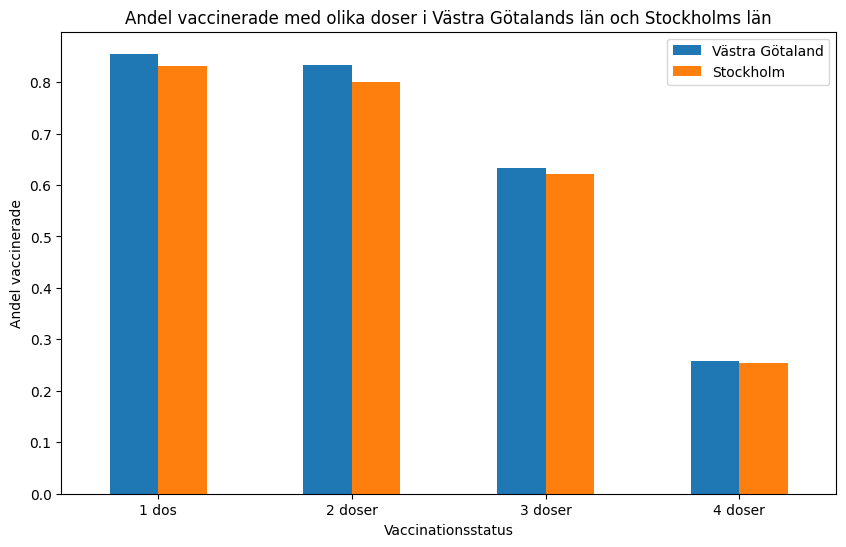

In [47]:
#Läser in datan
first_data_sheet_vaccine = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie")
second_data_sheet_vaccine = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie dos 3")
third_data_sheet_vaccine = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name="Vaccinerade tidsserie dos 4")

#Nu är frågan om jag ska göra en tidsserie för dos1,dos2,dos3,dos4 för varje län eller om jag ska ta senaste värdet som är inläst.
#Bestämde mig för att filtrera ut stockholm och västra götaland för varje sheet
vg_data = first_data_sheet_vaccine[first_data_sheet_vaccine["Region"] == "Västra Götaland"]
stockholm_data = first_data_sheet_vaccine[first_data_sheet_vaccine["Region"] == "Stockholm"]
#Nu har jag dos1 och dos2 i vg_data och stockholm_data respektivt, nu behöver jag skapa 4 fler sorteringar som tar ut dos1 och dos2 för varje län
vg_one_dose = vg_data[vg_data["Vaccinationsstatus"] == "Minst 1 dos"]["Andel vaccinerade"].max()
vg_two_doses = vg_data[vg_data["Vaccinationsstatus"] == "Minst 2 doser"]["Andel vaccinerade"].max()
stockholm_one_dose = stockholm_data[stockholm_data["Vaccinationsstatus"] == "Minst 1 dos"]["Andel vaccinerade"].max()
stockholm_two_doses = stockholm_data[stockholm_data["Vaccinationsstatus"] == "Minst 2 doser"]["Andel vaccinerade"].max()
# Nu har jag sparat antalet för varje dos i första bladet. Dags för samma sak fast för blad 2 och 3
vg_three_doses = second_data_sheet_vaccine[second_data_sheet_vaccine["Region"] == "Västra Götaland"]["Andel vaccinerade"].max()
vg_four_doses = third_data_sheet_vaccine[third_data_sheet_vaccine["Region"] == "Västra Götaland"]["Andel vaccinerade"].max()
stockholm_three_doses = second_data_sheet_vaccine[second_data_sheet_vaccine["Region"] == "Stockholm"]["Andel vaccinerade"].max()
stockholm_four_doses = third_data_sheet_vaccine[third_data_sheet_vaccine["Region"] == "Stockholm"]["Andel vaccinerade"].max()

#Nu har jag 8 data punkter som jag kan sätta in i ett fint stapeldiagram för att jämföra antalet doser emellan de olika regionerna
#Men först så måste jag slänga in värderna i en DataFrame
vaccination_data = pd.DataFrame({
    "Vaccination Status": ["1 dos", "2 doser", "3 doser", "4 doser"],
    "Västra Götaland": [vg_one_dose, vg_two_doses, vg_three_doses, vg_four_doses],
    "Stockholm": [stockholm_one_dose, stockholm_two_doses, stockholm_three_doses, stockholm_four_doses]
})

vaccination_data

#Plotten
vaccination_data.plot(x="Vaccination Status", kind="bar", figsize=(10, 6))
plt.title("Andel vaccinerade med olika doser i Västra Götalands län och Stockholms län")
plt.ylabel("Andel vaccinerade")
plt.xlabel("Vaccinationsstatus")
plt.xticks(rotation=0)

plt.savefig("Visualiseringar/Jamforelse_stockholm_vastra_gotaland_andel") #Sparar figuren

plt.show()

#I denna grafen att istället för att använda antalet att jämföra på så har vi tagit andelen.